In [2]:
import numpy as np 

In [3]:
import matplotlib.pyplot as plt

In [3]:
tableau=np.genfromtxt("Raw Data.csv",delimiter= "	")

In [4]:
print(tableau)

[[            nan             nan             nan             nan
              nan]
 [ 2.60240000e-02 -5.54447022e-01  1.09661957e+00  9.93259506e+00
   1.00083181e+01]
 [ 3.60160001e-02 -7.12218933e-01  1.27834168e+00  9.67602860e+00
   9.78605858e+00]
 ...
 [ 1.89389676e+02  3.82754059e-01  9.63546295e-01  9.77437408e+00
   9.82920703e+00]
 [ 1.89399668e+02  3.83652191e-01  9.45134583e-01  9.72886871e+00
   9.78219581e+00]
 [ 1.89409659e+02  3.26920166e-01  9.84203339e-01  9.71973770e+00
   9.77490839e+00]]


In [5]:
temps=tableau[:,0] #récupère tous les premiers éléments des lignes
ax=tableau[:,2] #récupère tous les deuxièmes éléments des lignes
ay=tableau[:,3]  #récupère tous les troisièmes éléments des lignes
az=tableau[:,4]#récupère tous les quatrièmes éléments des lignes


In [6]:
temps=np.delete(temps,[0]) #supprimer la premiere valeur de la liste qui est "nan" dans ce cas 
ax=np.delete(ax,[0])
ay=np.delete(ay,[0])
az=np.delete(az,[0])

In [7]:
# methode d'euler 

In [8]:
#initialisation
N=len(ay)
moy=np.mean(ay)
ay=ay-moy
vit=np.empty(N)
pos=np.empty(N)

In [9]:
# condition initiale 
vit[0]=0
pos[0]=0

In [10]:
#remplissage
for k in range(2,N):
    vit[k]=vit[k-1]+(temps[k]-temps[k-1])*ay[k-1]

for k in range(2,N):
    pos[k]=pos[k-1]+(temps[k]-temps[k-1])*vit[k-1]

vitmoy=np.mean(vit)

print ("La valeur moyenne de la vitesse est :",vitmoy,"m/s")

La valeur moyenne de la vitesse est : -0.4331318570329888 m/s


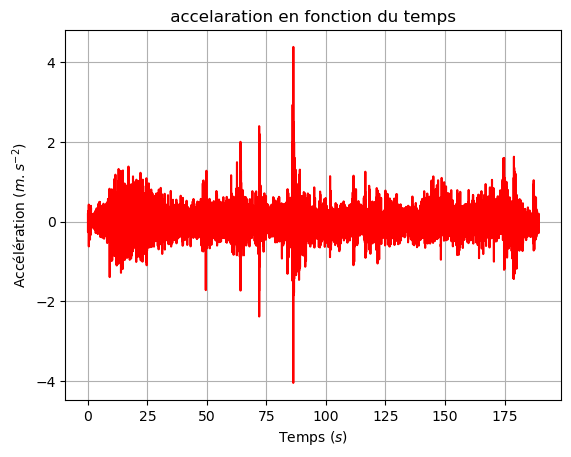

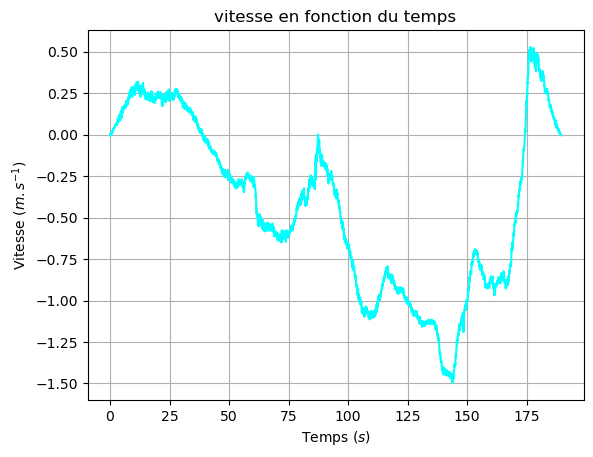

In [11]:
plt.plot(temps, ay , '-',color="red")
plt.title(" accelaration du metro en fonction du temps ")
plt.xlabel('Temps ($s$)')
plt.ylabel('Accélération ($m.s^{-2}$)')    
plt.grid()
plt.savefig('tram',dpi=400)

plt.figure()

plt.plot(temps,vit,'-', color="cyan")
plt.title ("vitesse en fonction du temps")
plt.xlabel('Temps ($s$)')
plt.ylabel('Vitesse ($m.s^{-1}$)')    
plt.grid()

plt.savefig('tram1',dpi=400)

In [12]:
tab2=np.genfromtxt("ascenceurbon.csv",delimiter= "	")

In [13]:
tab2

array([[ 3.90707083e-02, -1.70046387e-01, -4.25115967e-02,
         1.00316890e+01,  1.00332202e+01],
       [ 4.91157083e-02, -1.71393585e-01, -4.92475891e-02,
         1.00280965e+01,  1.00296819e+01],
       [ 5.91607083e-02, -1.66902924e-01, -4.64035034e-02,
         1.00102835e+01,  1.00117824e+01],
       ...,
       [ 2.48368503e+01, -1.45198059e-01, -4.68525696e-02,
         1.00402213e+01,  1.00413804e+01],
       [ 2.48468953e+01, -1.46694946e-01, -3.06861877e-02,
         1.00134270e+01,  1.00145485e+01],
       [ 2.48569403e+01, -1.37414246e-01, -2.06570435e-02,
         1.00029488e+01,  1.00039139e+01]])

In [15]:
temps=tab2[:,0]  #récupère tous les premiers éléments des lignes
ax=tab2[:,2] #récupère tous les deuxièmes éléments des lignes
ay=tab2[:,3] #récupère tous les troisièmes éléments des lignes
az=tab2[:,4]  #récupère tous les quatrièmes éléments des lignes

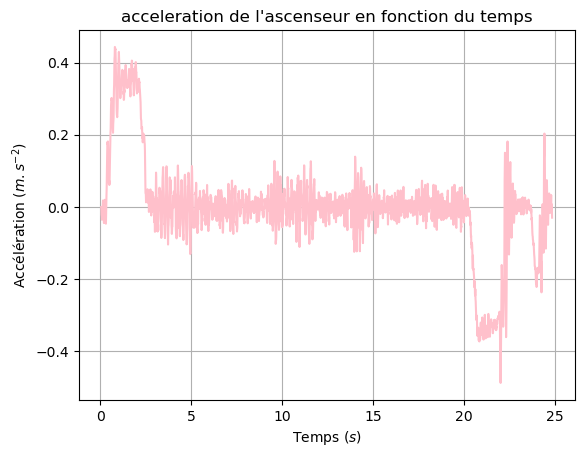

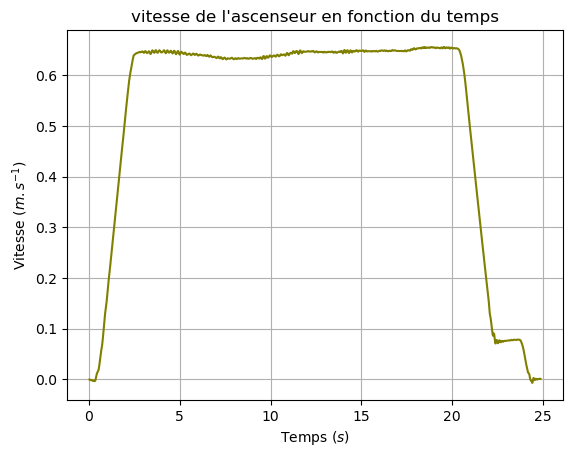

<Figure size 640x480 with 0 Axes>

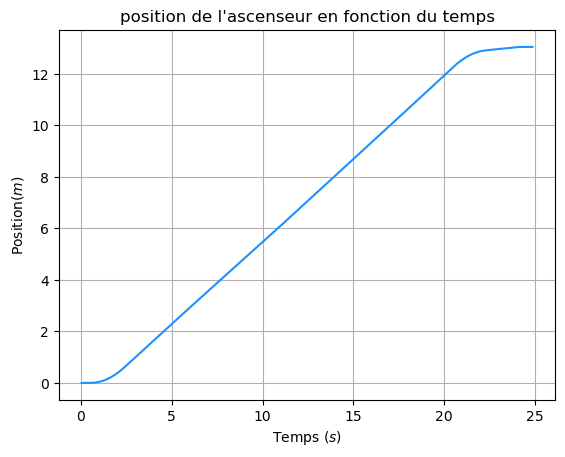

In [26]:
# methode d'Euler
N=len(az)
moy=np.mean(az)
az=az-moy

vit=np.empty(N)
vit[0]=0

for k in range(1,N):
    vit[k]=vit[k-1]+(temps[k]-temps[k-1])*az[k-1]

plt.plot(temps, az , '-', color="pink")
plt.title("acceleration de l'ascenseur en fonction du temps")
plt.xlabel('Temps ($s$)')
plt.ylabel('Accélération ($m.s^{-2}$)')    
plt.grid()
plt.savefig('ascenceur',dpi=400)

plt.figure()

plt.plot(temps,vit,'-',color='olive')
plt.title("vitesse de l'ascenseur en fonction du temps")
plt.xlabel('Temps ($s$)')
plt.ylabel('Vitesse ($m.s^{-1}$)')    
plt.grid()
plt.savefig('ascenceur1',dpi=400)

plt.figure()

pos=np.empty(N)
pos[0]=0
for k in range(1,N):
    pos[k]=pos[k-1]+(temps[k]-temps[k-1])*vit[k-1]
    
plt.figure()
plt.plot(temps,pos,'-', color="dodgerblue")
plt.title("position de l'ascenseur en fonction du temps")
plt.xlabel('Temps ($s$)')
plt.ylabel('Position($m$)')
plt.grid()
plt.savefig('ascenceur2',dpi=400)

In [7]:
from scipy.signal import savgol_filter
from numpy.fft import fft, fftfreq #modules pour analyse de Fourier
import scipy.fft

In [5]:
tab3=np.genfromtxt("machine3.csv",delimiter= "	")

In [6]:
tab3 

array([[ 8.38625000e-04, -2.80546600e+00,  9.78410385e+00,
         2.38214630e+00,  1.04534180e+01],
       [ 1.08856250e-02, -3.51768494e-01,  1.01551822e+01,
        -1.93891800e+00,  1.03446058e+01],
       [ 2.09336250e-02,  4.62538147e+00,  9.13385605e+00,
         6.87370605e-01,  1.02612844e+01],
       ...,
       [ 9.97792296e+00,  4.07752075e+00,  9.25450516e+00,
         3.05320084e+00,  1.05638098e+01],
       [ 9.98797096e+00, -5.37382507e-01,  9.81284409e+00,
         1.19750977e+00,  9.90023831e+00],
       [ 9.99801896e+00, -3.32353867e+00,  9.56196579e+00,
        -2.50833389e+00,  1.04292300e+01]])

In [8]:
temps=tab3[:,0] #récupère tous les premiers éléments des lignes
ax=tab3[:,1] #récupère tous les deuxièmes éléments des lignes
ay=tab3[:,2] #récupère tous les troisièmes éléments des lignes
az=tab3[:,3] #récupère tous les quatrièmes éléments des lignes

In [9]:
N=len(az)
moy=np.mean(az)
az=az-moy
vit=np.empty(N)
vit[0]=0

for k in range(1,N):
    vit[k]=vit[k-1]+(temps[k]-temps[k-1])*az[k-1]

<Figure size 640x480 with 0 Axes>

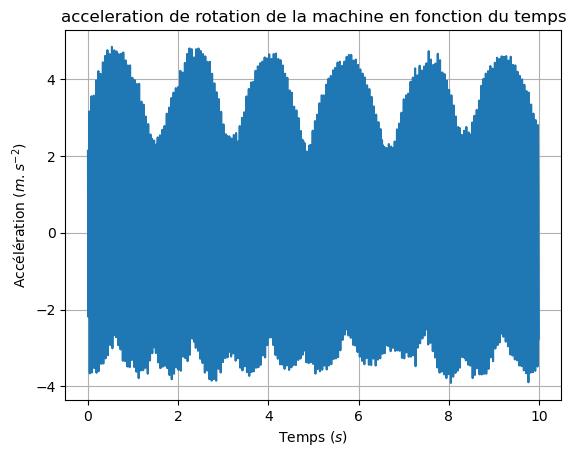

<Figure size 640x480 with 0 Axes>

In [10]:
plt.plot(temps, az , '-')
plt.title("acceleration de rotation de la machine en fonction du temps")
plt.xlabel('Temps ($s$)')
plt.ylabel('Accélération ($m.s^{-2}$)')
plt.grid()
plt.figure()

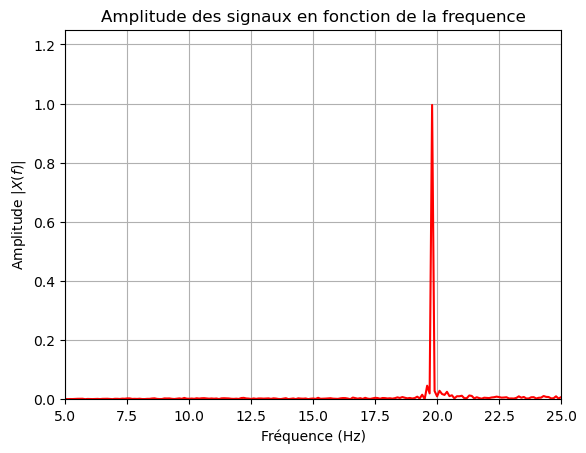

In [12]:
X = fft(az)  # Transformée de fourier
freq = fftfreq(az.size, d=temps[1]-temps[0])  # Fréquences de la transformée de Fourier

# Calcul du nombre d'échantillon
N = az.size

# On prend la valeur absolue de l'amplitude uniquement pour les fréquences positives et normalisation
X_abs = np.abs(X[:N//2])*2.0/N

# On garde uniquement les fréquences positives

freq_pos = freq[:N//2]

plt.figure()

plt.plot(freq_pos, X_abs,'-r', label="Amplitude absolue")

plt.xlim(0, max(freq_pos))  # On réduit la plage des fréquences à la zone utile

plt.grid()

plt.xlabel(r"Fréquence (Hz)")

plt.ylabel(r"Amplitude $|X(f)|$")

plt.title("Amplitude des signaux en fonction de la frequence")

plt.xlim(5,25)

plt.ylim(0,1.25)

plt.show()